In [72]:
import glob
import os
from xml.etree import ElementTree as ET
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Load data

In [4]:
images = glob.glob('data/archive/train_zip/train/*.jpg')
annotations = glob.glob('data/archive/train_zip/train/*.xml')

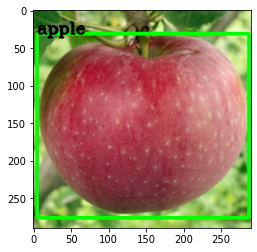

In [86]:
root = ET.parse(np.random.choice(annotations)).getroot()
file_name = root.find('filename').text

image = glob.glob('data/archive/train_zip/train/' + file_name)[0]
img = np.array(Image.open(image))

for t in root.findall('object'):    
    bbox = []
    for bb in t.find('bndbox'):
        bbox.append(int(bb.text))
        
    cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 255, 0), 4)
    cv2.putText(img, t.find('name').text, (bbox[0], bbox[1]), cv2.FONT_HERSHEY_COMPLEX, 0.7, (0, 0, 0), 2)
        
plt.imshow(img)

# Class Distribution

In [71]:
dist = []
sizes = {'width': [], 'height': []}

for annot in annotations:
    tree = ET.parse(annot)
    root = tree.getroot()
    
    for size in root.findall('size'):
        width = size.find('width').text
        height = size.find('height').text
        sizes['width'].append(width)
        sizes['height'].append(height)
        
    for t in root.findall('object'):
        dist.append(t.find('name').text)

In [85]:
pd.DataFrame(sizes).describe()

,width,height
count,240,240
unique,95,144
top,0,0
freq,33,33


/home/superceed1/anaconda3/envs/py38torch17/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

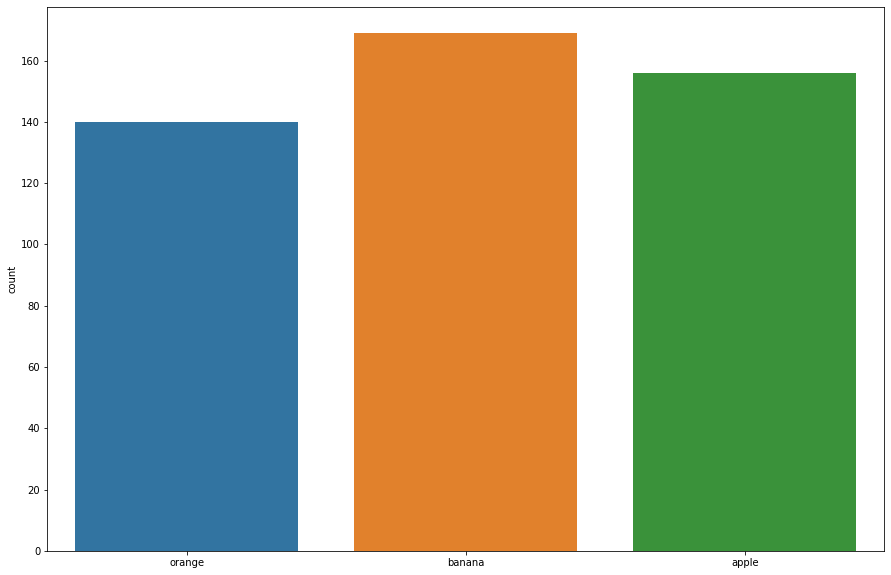

In [66]:
plt.figure(figsize=(15, 10))
sns.countplot(dist)